<a id='top'></a>

# Signality Tracking Data Engineering of Hammarby vs. Malmö FF 20.10.2019
##### Notebook to explores three sample matches of Spatiotemporal Tracking data from [Signality](https://www.signality.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 17/01/2020<br>
Notebook last updated: 17/01/2021

![title](../../../../img/signality_screenshot.png)

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Signality](https://www.signality.com/) Spatiotemporal Tracking and corresponding Event data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv
import pprint as pp

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import re
import os
from collections import Counter, defaultdict
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import patches
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

# Progress Bar
from tqdm import tqdm

# Fran Peralta's custom libraries for working with Signality data
from Libraries import Functions_PreprocessTrackingData as funcs
from Libraries import Dictionaries as dicts

# ML libraries
import scipy.signal as signal
from scipy.spatial import Voronoi, voronoi_plot_2d

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print('Setup Complete')

Setup Complete


### Defined Filepaths

In [2]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_metrica = os.path.join(base_dir, 'data', 'metrica')
data_dir_signality = os.path.join(base_dir, 'data', 'signality')
data_dir_signality_tracking = os.path.join(base_dir, 'data', 'signality', 'raw', '2019', 'tracking_data')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_signality = os.path.join(base_dir, 'scripts', 'signality')
scripts_dir_metrica = os.path.join(base_dir, 'scripts', 'metrica')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_signality = os.path.join(base_dir, 'img', 'fig', 'signality')
video_dir = os.path.join(base_dir, 'video')
video_dir_signality = os.path.join(base_dir, 'video', 'signality')

In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

# Define pitch dimensions
pitch_length = 106.0
pitch_width = 68

### Custom Libraries for Tracking Data

In [5]:
# Custom libraries for working with Signality data based on Laurie Shaw's Metric Sports libraries for Metrica Sports data

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir))

## Signality scripts - custom scripts derived from Laurie Shaw's Metrica scripts
import Signality_IO as sio
import Signality_Velocities as svel

### Notebook Settings

In [6]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [Signality](https://www.signality.com/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [matplotlib]() for plotting, [scipy]() for Machine Learning.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

### <a id='#section2.1'>2.1. Goals</a>
*    Hammarby 2 vs. 0 Malmö FF on 20th October 2019 [[link](https://int.soccerway.com/matches/2019/10/20/sweden/allsvenskan/hammarby/malmo-fotbollsforening/2947351/)]
     - A. Kačaniklić 15' (1-0) (assist by N. Đurđić)
     - R. Magyar 88' (2-0) (assist by D. Bojanic)

### <a id='#section2.2'>2.2. Highlights</a>

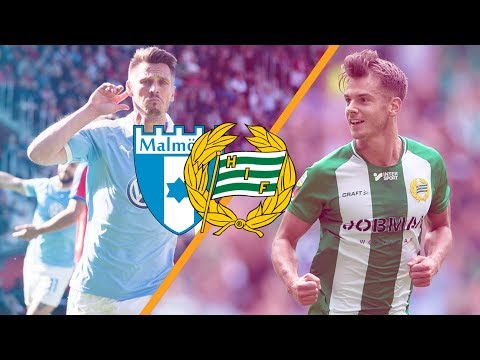

In [7]:
# Embed highlights for Hammarby (2) vs. (0) Malmö FF (20/10/2019)

## YouTube link (COMMENTED OUT)
YouTubeVideo('Q7OEEZGN-Bk', width=800, height=470)

## Local file
#Video(video_dir_signality + '/20191020_Hammarby_MalmöFF.mp4', width=770, height=530)

---

## <a id='#section3'>3. Data Sources</a>
[Signality](https://www.signality.com/) is a...

![title](../../../../img/signality_logo.png)

The tracking data represents the location of every player on the pitch with a temporal frequency of 25 Hz and the corresponding match time for each tracking frame is specified.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).


We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2.1'>3.2.1. Data Dictionaries</a>
The [Signality](https://www.signality.com/) Events dataset has fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

### <a id='#section3.2'>3.2. Import Data</a>

#### <a id='#section3.2.1'> 3.2.1. First Half

In [8]:
# Select the file from the three matches of Tracking data
#file_name = '20190722.Hammarby-IFElfsborg'
file_name = '20191020.Hammarby-MalmöFF'
#file_name = '20190930.Hammarby-Örebrö'        # NB: 2nd half almost no players in field

# Names of the teams playing in OPTA format
home_team_name = 'Hammarby IF'
away_team_name = 'Malmö FF'
year = file_name[:4]

# First '.1' or second '.2' half of the match
data_file_name=file_name+'.1'

#Preprocesses the file in to the format we use.
if not os.path.exists(data_dir_signality_tracking + '/Preprocessed/' + data_file_name + '_preprocessed.pickle'):
    preprocessed = False
    [ball_position_not_transf, players_position_not_transf, players_team_id, events, players_jersey,
     info_match,names_of_players] = funcs.LoadDataHammarbyNewStructure2020(data_file_name, data_dir_signality_tracking + '/')
else:
    preprocessed = True
    [ball_position_not_transf,players_position_not_transf,players_team_id,events,players_jersey,
     info_match,names_of_players,players_in_play_list] = funcs.LoadDataHammarbyPreprocessed(data_file_name, data_dir_signality_tracking + '/')

frame_id = 1000
team_index = players_team_id[frame_id].astype(int).reshape(len(players_team_id[frame_id]),)
players_in_play = funcs.GetPlayersInPlay(players_position_not_transf,frame_id)

[players_position,ball_position] = funcs.TransformCoords(players_position_not_transf,ball_position_not_transf)


Loading data, this might take some seconds...
Data has been loaded



In [9]:
### Store data in dataframe with same format as Metrica data to be able to use parts of Laurie Shaw's code
tracking_first_half = np.array(players_position)
totalplayers = 36
tracking_first_half.shape = -1, totalplayers*2     # X and Y coordinate for every player
tracking_first_half = pd.DataFrame(tracking_first_half)
column_names = []                   
for i in range(totalplayers):       # Rename columns
    if i < totalplayers/2:
        column_names.append(f'Home_{players_jersey[i]}_x')
        column_names.append(f'Home_{players_jersey[i]}_y')
    else:
        column_names.append(f'Away_{players_jersey[i]}_x')
        column_names.append(f'Away_{players_jersey[i]}_y')
tracking_first_half.columns = column_names

In [10]:
# Convert coordinates
tracking_first_half.replace([-105, -68], float('nan'), inplace=True)
pitch_length = info_match['calibration']['pitch_size'][0]
pitch_width = info_match['calibration']['pitch_size'][1]
for i in range(totalplayers*2):
    if i % 2 == 0:
        tracking_first_half.iloc[:,i] = tracking_first_half.iloc[:,i] - pitch_length/2            # subtract pitch length to set centre circle to (0,0)       
    else:                                                                   
        tracking_first_half.iloc[:,i] = (tracking_first_half.iloc[:,i] - pitch_width/2) * -1      # also multiply by -1 to mirror horizontally
# split home & away team
tracking_home_first_half=tracking_first_half.iloc[:,0:totalplayers]       
tracking_away_first_half=tracking_first_half.iloc[:,totalplayers:totalplayers*2]

In [11]:
# Convert ball position coordinates
ball_position = pd.DataFrame(ball_position, index=tracking_home_first_half.index)
ball_position.columns = ['ball_x', 'ball_y']
ball_position.replace([np.inf], float('nan'), inplace=True)
ball_position.iloc[:,0] = ball_position.iloc[:,0] - pitch_length/2
ball_position.iloc[:,1] = (ball_position.iloc[:,1] - pitch_width/2) * -1

In [12]:
# Add ball position to dataframes
tracking_home_first_half=pd.concat([tracking_home_first_half, ball_position], 1)
tracking_away_first_half=pd.concat([tracking_away_first_half, ball_position], 1) 

In [13]:
#### Add velocitiy & acceleration & distance to goal
tracking_home_first_half = svel.calc_player_velocities(tracking_home_first_half, file_name='20191020.Hammarby-MalmöFF', data_file_name=file_name+'.1', maxspeed=12, smoothing_v=True, smoothing_a=True, distance2goal=True, pitch_length=106, pitch_width=68)
#### We don't add distance to goal for Hammarby's opponent because other direction not implemented
tracking_awa_first_halfy = svel.calc_player_velocities(tracking_away_first_half, file_name='20191020.Hammarby-MalmöFF', data_file_name=file_name+'.1', maxspeed=12, smoothing_v=True, smoothing_a=True, distance2goal=False, pitch_length=106, pitch_width=68)

In [14]:
tracking_home_first_half

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.662715,22.429240,19.664149,1.273684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.675311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.184456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.682792,22.419298,19.674187,1.283626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.803824,8.709942,1.203824,-15.994737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.685523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.200522,NaN,NaN,NaN,NaN,56.514477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.917897,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.712906,22.419298,19.684226,1.293567,NaN,NaN,18.710516,-5.108772,NaN,NaN,NaN,NaN,8.77265

In [15]:
tracking_away_first_half

,Away_1_x,Away_1_y,Away_3_x,Away_3_y,Away_5_x,Away_5_y,Away_11_x,Away_11_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_24_x,Away_24_y,Away_27_x,Away_27_y,Away_16_x,Away_16_y,Away_2_x,Away_2_y,Away_17_x,Away_17_y,Away_4_x,Away_4_y,Away_32_x,Away_32_y,Away_6_x,Away_6_y,Away_7_x,Away_7_y,Away_8_x,Away_8_y,Away_9_x,Away_9_y,Away_23_x,Away_23_y,ball_x,ball_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.846199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.856140,-21.171415,6.135088,NaN,NaN,NaN,NaN,NaN,NaN,-7.208222,7.079532,NaN,NaN,NaN,NaN,0.501147,-0.058480,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.866082,-21.161377,6.145029,NaN,NaN,NaN,NaN,NaN,NaN,-7.188145,7.089474,NaN,NaN,NaN,NaN,0.521224,-0.068421,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.437667,-0.754386,-28.951052,-18.470175,-28.910899,-22.605848,-27.254589,-5.585965,-28.730210,0.647368,-29.242161,10.807602,-19.505067,-22.069006,-22.777533,-11.471345,-18.471128,1.750877,-6.264627,-0.843860,-11.313862,-10.994152,NaN,NaN
57697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.407553,-0.744444,-28.890822,-18.410526,-28.890822,-22.516374,-27.204398,-5.546199,-28.690057,0.687135,-29.151816,10.887135,-19.454876,-22.039181,-22.677151,-11.361988,-18.370746,1.830409,-6.164245,-0.833918,-11.173327,-11.004094,NaN,NaN
57698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.377438,-0.734503,-28.830593,-18.360819,-28.880784,-22.426901,-27.144168,-5.496491,-28.639866,0.726901,-29.071511,10.966667,-19.404685,-22.019298,-22.586807,-11.262573,-18.280402,1.900000,-6.053824,-0.823977,-11.032792,-11.004094,NaN,NaN
57699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.347323,-0.724561,-28.770363,-18.311111,-28.860707,-22.347368,-27.093977,-5.446784,-28.599713,0.776608,-29.001243,11.056140,-19.354493,-21.989474,-22.496463,-11.153216,-18.180019,1.969591,-5.943403,-0.804094,-10.892256,-11.014035,NaN,NaN


#### <a id='#section3.2.2'> 3.2.2. Second Half

In [16]:
#file_name = '20190722.Hammarby-IFElfsborg'
file_name = '20191020.Hammarby-MalmöFF'
#file_name = '20190930.Hammarby-Örebrö'        # NB: 2nd half almost no players in field

#Names of the teams playing in OPTA format
home_team_name = 'Hammarby IF'
away_team_name = 'Malmö FF'
year = file_name[:4]

#First '.1' or second '.2' half of the match
data_file_name=file_name+'.2'

#Preprocesses the file in to the format we use.
if not os.path.exists(data_dir_signality_tracking + '/Preprocessed/' + data_file_name + '_preprocessed.pickle'):
    preprocessed = False
    [ball_position_not_transf, players_position_not_transf, players_team_id, events, players_jersey,
     info_match,names_of_players] = funcs.LoadDataHammarbyNewStructure2020(data_file_name, data_dir_signality_tracking + '/')
else:
    preprocessed = True
    [ball_position_not_transf,players_position_not_transf,players_team_id,events,players_jersey,
     info_match,names_of_players,players_in_play_list] = funcs.LoadDataHammarbyPreprocessed(data_file_name, data_dir_signality_tracking + '/')

frame_id = 1000
team_index = players_team_id[frame_id].astype(int).reshape(len(players_team_id[frame_id]),)
players_in_play = funcs.GetPlayersInPlay(players_position_not_transf,frame_id)

[players_position,ball_position] = funcs.TransformCoords(players_position_not_transf,ball_position_not_transf)


Loading data, this might take some seconds...
Data has been loaded



In [17]:
### Store data in dataframe with same format as Metrica data to be able to use parts of Laurie Shaw's code
tracking_second_half = np.array(players_position)
totalplayers = 36
tracking_second_half.shape = -1, totalplayers*2     # X and Y coordinate for every player
tracking_second_half = pd.DataFrame(tracking_second_half)
column_names = []                   
for i in range(totalplayers):       # Rename columns
    if i < totalplayers/2:
        column_names.append(f'Home_{players_jersey[i]}_x')
        column_names.append(f'Home_{players_jersey[i]}_y')
    else:
        column_names.append(f'Away_{players_jersey[i]}_x')
        column_names.append(f'Away_{players_jersey[i]}_y')
tracking_second_half.columns = column_names

In [18]:
# Convert coordinates
tracking_second_half.replace([-105, -68], float('nan'), inplace=True)
pitch_length = info_match['calibration']['pitch_size'][0]
pitch_width = info_match['calibration']['pitch_size'][1]
for i in range(totalplayers*2):
    if i % 2 == 0:
        tracking_second_half.iloc[:,i] = tracking_second_half.iloc[:,i] - pitch_length/2            # subtract pitch length to set centre circle to (0,0)       
    else:                                                                   
        tracking_second_half.iloc[:,i] = (tracking_second_half.iloc[:,i] - pitch_width/2) * -1      # also multiply by -1 to mirror horizontally
# split home & away team
tracking_home_second_half=tracking_second_half.iloc[:,0:totalplayers]       
tracking_away_second_half=tracking_second_half.iloc[:,totalplayers:totalplayers*2]

In [19]:
# Convert ball position coordinates
ball_position = pd.DataFrame(ball_position, index=tracking_home_second_half.index)
ball_position.columns = ['ball_x', 'ball_y']
ball_position.replace([np.inf], float('nan'), inplace=True)
ball_position.iloc[:,0] = ball_position.iloc[:,0] - pitch_length/2
ball_position.iloc[:,1] = (ball_position.iloc[:,1] - pitch_width/2) * -1

In [20]:
# Add ball position to DataFrames
tracking_home_second_half = pd.concat([tracking_home_second_half, ball_position], 1)
tracking_away_second_half = pd.concat([tracking_away_second_half, ball_position], 1) 

In [21]:
#### Add velocitiy & acceleration & distance to goal
tracking_home_second_half = svel.calc_player_velocities(tracking_home_second_half, file_name='20191020.Hammarby-MalmöFF', data_file_name=file_name+'.2', maxspeed=12, smoothing_v=True, smoothing_a=True, distance2goal=True, pitch_length=106, pitch_width=68)
#### We don't add distance to goal for Hammarby's opponent because other direction not implemented
tracking_away_second_half = svel.calc_player_velocities(tracking_away_second_half, file_name='20191020.Hammarby-MalmöFF', data_file_name=file_name+'.2', maxspeed=12, smoothing_v=True, smoothing_a=True, distance2goal=False, pitch_length=106, pitch_width=68)

In [22]:
tracking_home_second_half

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.006023,0.309357,-0.030880,-27.825146,-20.920459,6.035673,NaN,NaN,-8.031358,16.414620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071033,-13.578947,0.762141,0.746784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.166459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.887502,NaN,NaN,NaN,NaN,52.243196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.006506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.200208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.780675,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-46.006023,0.299415,-0.010803,-27.825146,-20.920459,6.035673,NaN,NaN,-8.031358,16.424561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071033,-13.578947,0.762141,0.756725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.166459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.869725,NaN,NaN,NaN,NaN,52.243339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.006476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.202791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.780675,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [23]:
tracking_away_second_half

,Away_1_x,Away_1_y,Away_3_x,Away_3_y,Away_5_x,Away_5_y,Away_11_x,Away_11_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_24_x,Away_24_y,Away_27_x,Away_27_y,Away_16_x,Away_16_y,Away_2_x,Away_2_y,Away_17_x,Away_17_y,Away_4_x,Away_4_y,Away_32_x,Away_32_y,Away_6_x,Away_6_y,Away_7_x,Away_7_y,Away_8_x,Away_8_y,Away_9_x,Away_9_y,Away_23_x,Away_23_y,ball_x,ball_y,Away_1_vx,Away_1_vy,Away_1_speed,Away_1_acceleration,Away_11_vx,Away_11_vy,Away_11_speed,Away_11_acceleration,Away_16_vx,Away_16_vy,Away_16_speed,Away_16_acceleration,Away_17_vx,Away_17_vy,Away_17_speed,Away_17_acceleration,Away_18_vx,Away_18_vy,Away_18_speed,Away_18_acceleration,Away_19_vx,Away_19_vy,Away_19_speed,Away_19_acceleration,Away_2_vx,Away_2_vy,Away_2_speed,Away_2_acceleration,Away_23_vx,Away_23_vy,Away_23_speed,Away_23_acceleration,Away_24_vx,Away_24_vy,Away_24_speed,Away_24_acceleration,Away_27_vx,Away_27_vy,Away_27_speed,Away_27_acceleration,Away_3_vx,Away_3_vy,Away_3_speed,Away_3_acceleration,Away_32_vx,Away_32_vy,Away_32_speed,Away_32_acceleration,Away_4_vx,Away_4_vy,Away_4_speed,Away_4_acceleration,Away_5_vx,Away_5_vy,Away_5_speed,Away_5_acceleration,Away_6_vx,Away_6_vy,Away_6_speed,Away_6_acceleration,Away_7_vx,Away_7_vy,Away_7_speed,Away_7_acceleration,Away_8_vx,Away_8_vy,Away_8_speed,Away_8_acceleration,Away_9_vx,Away_9_vy,Away_9_speed,Away_9_acceleration
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.879732,6.413450,18.740631,-8.498830,18.800860,-18.579532,14.705258,-25.846784,8.059943,5.081287,11.081453,-9.403509,3.502581,-15.288889,0.471033,9.505263,0.400765,-9.502924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.054685,0.100585,12.787954,21.912281,15.869694,6.403509,18.720554,-8.498830,18.810899,-18.569591,14.695220,-25.846784,8.059943,5.081287,11.071415,-9.413450,3.502581,-15.288889,0.471033,9.495322,0.380688,-9.492982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.074761,0.100585,12.787954,21.902339,15.869694,6.403509,18.700478,-8.488889,18.810899,-18.559649,14.695220,-25.856725,8.049904,5.081287,11.071415,-9.423392,3.512620,-15.278947,0.460994,9.485380,0.370650,-9.473099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

#### <a id='#section3.2.3'> 3.2.3. Concatenate First and Second Half DataFrames

In [24]:
tracking_home_full = pd.concat([tracking_home_first_half, tracking_home_second_half])

In [25]:
tracking_away_full = pd.concat([tracking_away_first_half, tracking_away_second_half])

In [26]:
tracking_home_full

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.662715,22.429240,19.664149,1.273684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.675311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.184456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.682792,22.419298,19.674187,1.283626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.803824,8.709942,1.203824,-15.994737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.685523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.200522,NaN,NaN,NaN,NaN,56.514477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.917897,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.712906,22.419298,19.684226,1.293567,NaN,NaN,18.710516,-5.108772,NaN,NaN,NaN,NaN,8.77265

In [27]:
tracking_away_full

,Away_1_x,Away_1_y,Away_3_x,Away_3_y,Away_5_x,Away_5_y,Away_11_x,Away_11_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_24_x,Away_24_y,Away_27_x,Away_27_y,Away_16_x,Away_16_y,Away_2_x,Away_2_y,Away_17_x,Away_17_y,Away_4_x,Away_4_y,Away_32_x,Away_32_y,Away_6_x,Away_6_y,Away_7_x,Away_7_y,Away_8_x,Away_8_y,Away_9_x,Away_9_y,Away_23_x,Away_23_y,ball_x,ball_y,Away_1_vx,Away_1_vy,Away_1_speed,Away_1_acceleration,Away_11_vx,Away_11_vy,Away_11_speed,Away_11_acceleration,Away_16_vx,Away_16_vy,Away_16_speed,Away_16_acceleration,Away_17_vx,Away_17_vy,Away_17_speed,Away_17_acceleration,Away_18_vx,Away_18_vy,Away_18_speed,Away_18_acceleration,Away_19_vx,Away_19_vy,Away_19_speed,Away_19_acceleration,Away_2_vx,Away_2_vy,Away_2_speed,Away_2_acceleration,Away_23_vx,Away_23_vy,Away_23_speed,Away_23_acceleration,Away_24_vx,Away_24_vy,Away_24_speed,Away_24_acceleration,Away_27_vx,Away_27_vy,Away_27_speed,Away_27_acceleration,Away_3_vx,Away_3_vy,Away_3_speed,Away_3_acceleration,Away_32_vx,Away_32_vy,Away_32_speed,Away_32_acceleration,Away_4_vx,Away_4_vy,Away_4_speed,Away_4_acceleration,Away_5_vx,Away_5_vy,Away_5_speed,Away_5_acceleration,Away_6_vx,Away_6_vy,Away_6_speed,Away_6_acceleration,Away_7_vx,Away_7_vy,Away_7_speed,Away_7_acceleration,Away_8_vx,Away_8_vy,Away_8_speed,Away_8_acceleration,Away_9_vx,Away_9_vy,Away_9_speed,Away_9_acceleration
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.846199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.856140,-21.171415,6.135088,NaN,NaN,NaN,NaN,NaN,NaN,-7.208222,7.079532,NaN,NaN,NaN,NaN,0.501147,-0.058480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.408509,-3.866082,-21.161377,6.145029,NaN,NaN,NaN,NaN,NaN,NaN,-7.188145,7.089474,NaN,NaN,NaN,NaN,0.521224,-0.068421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [28]:
df_tracking_malmo_home = tracking_home_full

In [29]:
df_tracking_malmo_away = tracking_away_full

In [30]:
# Export DataFrame as a CSV file
df_tracking_malmo_home.to_csv(data_dir_signality + '/engineered/2019/tracking_data/hammerby_malmo_home.csv', index=None, header=True)
df_tracking_malmo_away.to_csv(data_dir_signality + '/engineered/2019/tracking_data/hammerby_malmo_away.csv', index=None, header=True)

#### <a id='#section3.2.2.'>3.2.2.  Preliminary Data Handling</a>
Due to the number of DataFrames - Home and Away, for three different matches, the following data handling is just for one DataFrame, for the Elfberg Home (`df_tracking_malmo_home`).

##### <a id='#section3.2.2.1.'>3.2.2.1. Tracking DataFrame</a>

Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [31]:
# Display the first 5 rows of the raw DataFrame, df_tracking_malmo_home
df_tracking_malmo_home.head()

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.662715,22.429240,19.664149,1.273684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.675311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.184456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.682792,22.419298,19.674187,1.283626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.803824,8.709942,1.203824,-15.994737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.685523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.200522,NaN,NaN,NaN,NaN,56.514477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.917897,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.712906,22.419298,19.684226,1.293567,NaN,NaN,18.710516,-5.108772,NaN,NaN,NaN,NaN,8.77265

In [32]:
# Display the last 5 rows of the raw DataFrame, df_tracking_malmo_home
df_tracking_malmo_home.tail()

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
71209,NaN,NaN,NaN,NaN,-34.803346,24.964327,NaN,NaN,-16.644168,12.368421,NaN,NaN,-32.584895,-5.426901,-50.202008,1.363158,-39.099713,-2.185965,-34.000287,9.226901,-38.025621,5.121053,-35.495985,16.573684,-31.922371,10.360234,-20.920459,-3.249708,-29.854493,17.697076,NaN,NaN,NaN,NaN,NaN,NaN,-33.684695,13.449594,NaN,NaN,NaN,NaN,NaN,-0.250956,-0.497076,0.556833,-0.750828,87.488203,1.111377,0.177527,1.125466,-0.289835,91.283324,NaN,NaN,NaN,NaN,NaN,0.394359,2.414369,2.446364,-2.806447,85.551993,0.645315,1.242690,1.400254,-2.133738,92.125651,NaN,NaN,NaN,NaN,NaN,0.717017,3.763576,3.831268,-3.895233,70.733924,NaN,NaN,NaN,NaN,NaN,-0.215105,0.284043,0.356302,-0.358875,103.211010,NaN,NaN,NaN,NaN,NaN,-0.430210,-1.313701,1.382350,-1.024487,90.034584,0.430210,-0.461571,0.630974,-0.555471,91.169561,0.466061,0.177527,0.498727,-0.030484,73.991857,NaN,NaN,NaN,NaN,NaN,-0.537763,-1.207185,1.321546,-1.906818,84.723394,NaN,NaN,NaN,NaN,NaN,2.258604,0.355054,2.286341,-2.396951,85.756781
71210,NaN,NaN,NaN,NaN,-34.763193,24.974269,NaN,NaN,-16.614054,12.517544,NaN,NaN,-32.494551,-5.416959,-50.212046,1.373099,-39.069598,-2.136257,-34.010325,9.207018,-38.005545,5.101170,-35.526099,16.523977,-31.902294,10.449708,-20.900382,-3.249708,-29.884608,17.647368,NaN,NaN,NaN,NaN,NaN,NaN,-33.977493,13.835416,NaN,NaN,NaN,NaN,NaN,-0.358509,-0.426065,0.556830,-0.883526,87.496090,1.111377,0.248538,1.138828,-1.158051,91.247423,NaN,NaN,NaN,NaN,NaN,0.537763,2.343358,2.404271,-4.223754,85.542948,0.752868,1.136174,1.362975,-2.801581,92.094379,NaN,NaN,NaN,NaN,NaN,0.752868,3.799081,3.872961,-5.855398,70.730512,NaN,NaN,NaN,NaN,NaN,-0.215105,0.284043,0.356302,-0.625175,103.221179,NaN,NaN,NaN,NaN,NaN,-0.501912,-1.278195,1.373208,-2.038463,90.055050,0.430210,-0.497076,0.657393,-0.673888,91.148402,0.537763,0.177527,0.566308,-0.420864,73.971799,NaN,NaN,NaN,NaN,NaN,-0.537763,-1.207185,1.321546,-2.470515,84.742480,NaN,NaN,NaN,NaN,NaN,2.258604,0.319549,2.281097,-3.280345,85.665989
71211,NaN,NaN,NaN,NaN,-34.713002,24.984211,NaN,NaN,-16.583939,12.666667,NaN,NaN,-32.394168,-5.407018,-50.222084,1.383041,-39.039484,-2.096491,-34.030402,9.197076,-37.985468,5.081287,-35.546176,16.474269,-31.882218,10.539181,-20.880306,-3.239766,-29.904685,17.597661,NaN,NaN,NaN,NaN,NaN,NaN,-34.253224,14.191939,NaN,NaN,NaN,NaN,NaN,-0.358509,-0.355054,0.504571,-0.

In [33]:
# Print the shape of the raw DataFrame, df_tracking_malmo_home
print(df_tracking_malmo_home.shape)

(128915, 128)


In [34]:
# Print the column names of the raw DataFrame, df_tracking_malmo_home
print(df_tracking_malmo_home.columns)

Index(['Home_24_x', 'Home_24_y', 'Home_5_x', 'Home_5_y', 'Home_14_x',
       'Home_14_y', 'Home_16_x', 'Home_16_y', 'Home_23_x', 'Home_23_y',
       ...
       'Home_7_vx', 'Home_7_vy', 'Home_7_speed', 'Home_7_acceleration',
       'Home_7_dist2goal', 'Home_77_vx', 'Home_77_vy', 'Home_77_speed',
       'Home_77_acceleration', 'Home_77_dist2goal'],
      dtype='object', length=128)


The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [35]:
# Data types of the features of the raw DataFrame, df_tracking_malmo_home
df_tracking_malmo_home.dtypes

Home_24_x               float64
Home_24_y               float64
Home_5_x                float64
Home_5_y                float64
Home_14_x               float64
                         ...   
Home_77_vx              float64
Home_77_vy              float64
Home_77_speed           float64
Home_77_acceleration    float64
Home_77_dist2goal       float64
Length: 128, dtype: object

All fourteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [36]:
# Info for the raw DataFrame, df_tracking_malmo_home
df_tracking_malmo_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128915 entries, 0 to 71213
Columns: 128 entries, Home_24_x to Home_77_dist2goal
dtypes: float64(128)
memory usage: 126.9 MB


In [37]:
# Description of the raw DataFrame, df_tracking_malmo_home showing some summary statistics for each numberical column in the DataFrame
df_tracking_malmo_home.describe()

,Home_24_x,Home_24_y,Home_5_x,Home_5_y,Home_14_x,Home_14_y,Home_16_x,Home_16_y,Home_23_x,Home_23_y,Home_26_x,Home_26_y,Home_77_x,Home_77_y,Home_25_x,Home_25_y,Home_2_x,Home_2_y,Home_13_x,Home_13_y,Home_4_x,Home_4_y,Home_3_x,Home_3_y,Home_19_x,Home_19_y,Home_40_x,Home_40_y,Home_6_x,Home_6_y,Home_11_x,Home_11_y,Home_7_x,Home_7_y,Home_20_x,Home_20_y,ball_x,ball_y,Home_11_vx,Home_11_vy,Home_11_speed,Home_11_acceleration,Home_11_dist2goal,Home_13_vx,Home_13_vy,Home_13_speed,Home_13_acceleration,Home_13_dist2goal,Home_14_vx,Home_14_vy,Home_14_speed,Home_14_acceleration,Home_14_dist2goal,Home_16_vx,Home_16_vy,Home_16_speed,Home_16_acceleration,Home_16_dist2goal,Home_19_vx,Home_19_vy,Home_19_speed,Home_19_acceleration,Home_19_dist2goal,Home_2_vx,Home_2_vy,Home_2_speed,Home_2_acceleration,Home_2_dist2goal,Home_20_vx,Home_20_vy,Home_20_speed,Home_20_acceleration,Home_20_dist2goal,Home_23_vx,Home_23_vy,Home_23_speed,Home_23_acceleration,Home_23_dist2goal,Home_24_vx,Home_24_vy,Home_24_speed,Home_24_acceleration,Home_24_dist2goal,Home_25_vx,Home_25_vy,Home_25_speed,Home_25_acceleration,Home_25_dist2goal,Home_26_vx,Home_26_vy,Home_26_speed,Home_26_acceleration,Home_26_dist2goal,Home_3_vx,Home_3_vy,Home_3_speed,Home_3_acceleration,Home_3_dist2goal,Home_4_vx,Home_4_vy,Home_4_speed,Home_4_acceleration,Home_4_dist2goal,Home_40_vx,Home_40_vy,Home_40_speed,Home_40_acceleration,Home_40_dist2goal,Home_5_vx,Home_5_vy,Home_5_speed,Home_5_acceleration,Home_5_dist2goal,Home_6_vx,Home_6_vy,Home_6_speed,Home_6_acceleration,Home_6_dist2goal,Home_7_vx,Home_7_vy,Home_7_speed,Home_7_acceleration,Home_7_dist2goal,Home_77_vx,Home_77_vy,Home_77_speed,Home_77_acceleration,Home_77_dist2goal
count,0.0,0.0,0.0,0.0,5469.000000,5469.000000,0.0,0.0,32069.000000,32069.000000,0.0,0.0,23849.000000,23849.000000,123832.000000,123832.000000,127934.000000,127934.000000,127735.000000,127735.000000,127426.000000,127426.000000,127190.000000,127190.000000,128022.000000,128022.000000,127414.000000,127414.000000,128080.000000,128080.000000,103589.000000,103589.000000,96262.000000,96262.000000,121741.000000,121741.000000,88438.000000,88438.000000,103253.000000,103253.000000,103253.000000,102989.000000,103589.000000,127292.000000,127292.000000,127292.000000,126927.000000,127735.000000,5465.000000,5465.000000,5465.000000,5461.000000,5469.000000,0.0,0.0,0.0,0.0,0.0,1.277700e+05,127770.000000,127770.000000,127569.000000,128022.000000,127711.000000,127711.000000,127711.000000,1.275280e+05,127934.000000,121283.000000,121283.000000,121283.000000,120937.000000,121741.000000,31912.000000,31912.000000,31912.000000,31796.000000,32069.000000,0.0,0.0,0.0,0.0,0.0,123506.000000,123506.000000,123506.000000,1.231830e+05,123832.000000,0.0,0.0,0.0,0.0,0.0,126905.000000,126905.000000,126905.000000,126681.000000,127190.000000,127081.000000,127081.000000,127081.000000,126770.000000,127426.000000,127147.000000,1.271470e+05,127147.000000,126910.000000,127414.000000,0.0,0.0,0.0,0.0,0.0,127803.000000,127803.000000,127803.000000,127578.000000,128080.000000,96133.000000,96133.000000,96133.000000,9.601400e+04,96262.000000,23721.000000,23721.000000,23721.000000,2.363300e+04,23849.000000
mean,NaN,NaN,NaN,NaN,-17.759437,15.581335,NaN,NaN,-0.083870,2.585554,NaN,NaN,-13.290604,-13.026004,-4.587155,-0.315685,-4.926349,-2.033202,-3.512754,-1.078691,-3.422071,-1.433633,-3.795044,-1.057672,-3.732907,0.296599,-3.680460,-5.534148,-3.512210,-2.792430,-1.224836,-7.806165,-4.303767,-1.096137,-4.733454,2.953228,-3.355531,-1.753588,0.002692,-0.030041,2.036046,0.000850,59.154495,-0.000681,-0.001759,1.755409,-0.000876,74.147926,-0.146887,0.209206,2.576550,-0.017092,73.190684,NaN,NaN,NaN,NaN,NaN,-1.862831e-02,-0.004112,2.105910,0.000324,65.537315,-0.013436,-0.002398,1.911216,1.745508e-03,69.646974,-0.017660,0.008986,2.161792,0.002064,57.598807,-0.059037,0.037870,2.122529,0.000012,55.105613,NaN,NaN,NaN,NaN,NaN,-0.008204,0.002477,0.930016,2.314435e-03,97.695027,NaN,NaN,NaN,NaN,NaN,-0.013610,-0.001363,1.959960,0.002402,70.804297,-0

<AxesSubplot:>

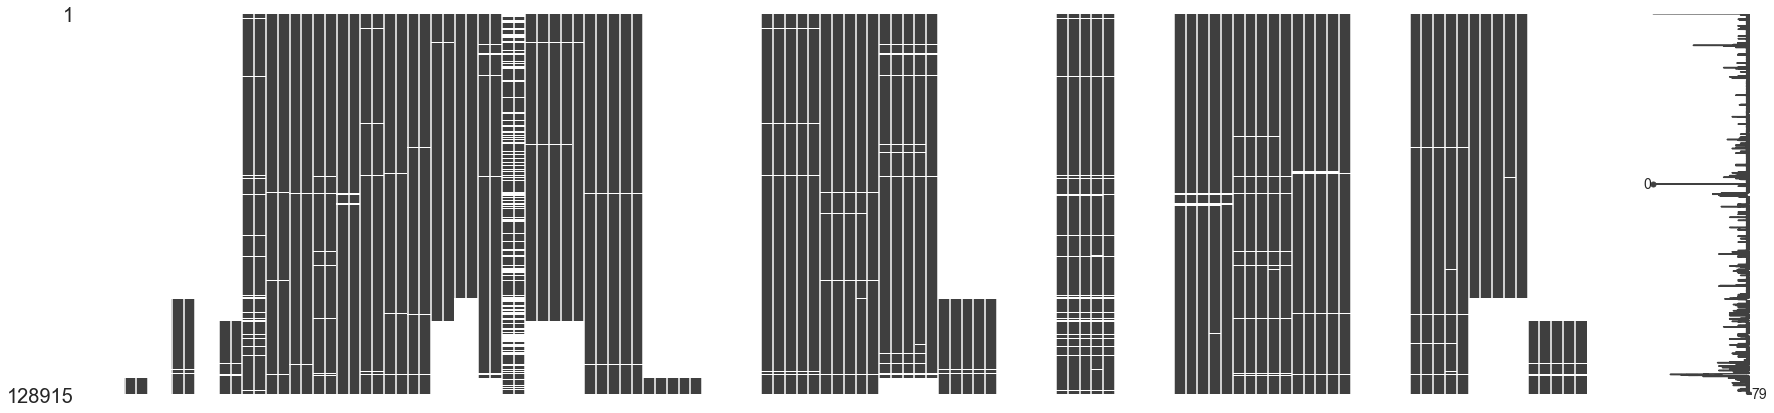

In [38]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_malmo_home
msno.matrix(df_tracking_malmo_home, figsize = (30, 7))

In [39]:
# Counts of missing values
null_value_stats = df_tracking_malmo_home.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Home_24_x               128915
Home_24_y               128915
Home_5_x                128915
Home_5_y                128915
Home_14_x               123446
                         ...  
Home_77_vx              105194
Home_77_vy              105194
Home_77_speed           105194
Home_77_acceleration    105282
Home_77_dist2goal       105066
Length: 128, dtype: int64

---

## <a id='#section4'>4. Summary</a>
This notebook is to engineered the [Signality](https://www.signality.com/) Tracking football data with [Python](https://www.python.org/) for the match between Hammarby 5 vs. 2 IF Elfsborg on 22nd July 2019 using [pandas](http://pandas.pydata.org/) DataFrames.

---

## <a id='#section5'>5. Next Steps</a>
The step is to visualise this data and create Pitch Control models.

---

## <a id='#section6'>6. References</a>

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)